# Tips Veri Setini Kurcalayalım

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

In [18]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## total_bill: Toplam ödenen hesap
## tip: bahşiş
## sex: cinsiyet
## smoker: sigara kullanıyor mu?
## day: Müşteri hangi gün gelmiş ?
## time: Müşteri sabah mı yoksa akşam mı gelmiş?
## size: Müşteri grubu kaç kişilik ?

In [19]:
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [21]:
# Soru1: En çok ödeme kadınlar tarafından mı yapıldı yoksa erkekler tarafından mı ?

In [23]:
df.groupby('sex')['total_bill'].count()
# En çok ödeme erkekler tarafından yapılmış.

sex
Male      157
Female     87
Name: total_bill, dtype: int64

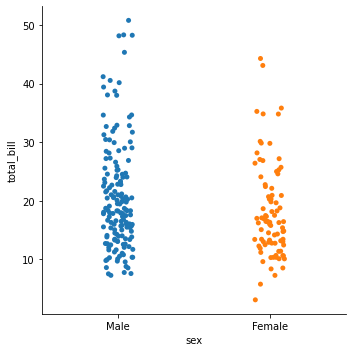

In [51]:
sns.catplot(data=df, x='sex', y='total_bill');
# Grafikte görüldüğü gibi en çok erkekler ödeme yapmışlar.

In [52]:
# Soru2: En çok erkekler mi sigara kullanıyor yoksa kadınlar mı ?

In [53]:
df.groupby('sex')['smoker'].count()

sex
Male      157
Female     87
Name: smoker, dtype: int64

In [58]:
# Soru3: Hangi günlerde en çok ödemeyi hangi cinsiyet yapmış ?

In [57]:

df.groupby(['day', 'sex'])[['total_bill']].count()

total_bill
day  sex               
Thur Male            30
     Female          32
Fri  Male            10
     Female           9
Sat  Male            59
     Female          28
Sun  Male            58
     Female          18

In [81]:
# Soru4: Hangi günlerde ortalama ne kadar tip verilmiş ?

In [84]:
df.groupby('day')[['tip']].mean().T

day,Thur,Fri,Sat,Sun
tip,2.771452,2.734737,2.993103,3.255132


In [85]:
# Soru5: Günlerde maksimum ne kadar tip verilmiş ?

In [87]:
df.groupby('day')[['tip']].max().T

day,Thur,Fri,Sat,Sun
tip,6.7,4.73,10.0,6.5


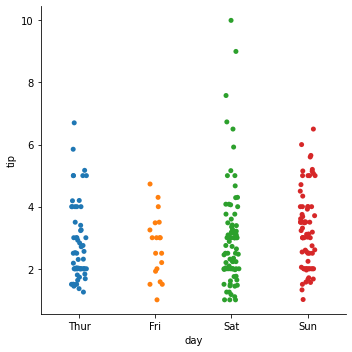

In [93]:
sns.catplot(data=df, x='day', y='tip');

In [94]:
# Soru6: Cinsiyetlere göre tip grafiğini oluştur.

In [96]:
df.groupby('sex')[['tip']].mean()

,tip
sex,
Male,3.089618
Female,2.833448


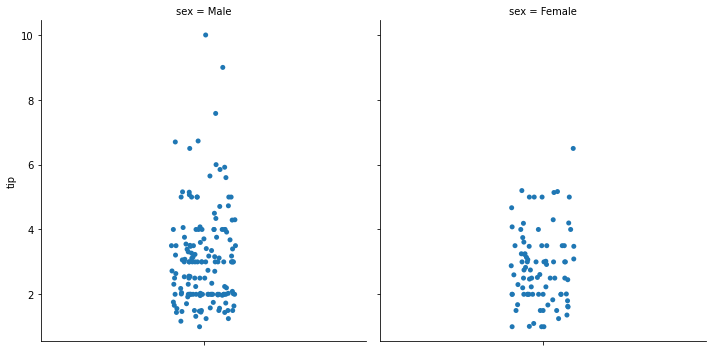

In [101]:
sns.catplot(data=df, y='tip', col='sex');

In [102]:
# Soru7: Günlere göre hangi cinsiyet ne kadar tip vermiş ?

In [103]:
df.groupby(['day', 'sex'])[['tip']].mean()

tip
day  sex             
Thur Male    2.980333
     Female  2.575625
Fri  Male    2.693000
     Female  2.781111
Sat  Male    3.083898
     Female  2.801786
Sun  Male    3.220345
     Female  3.367222

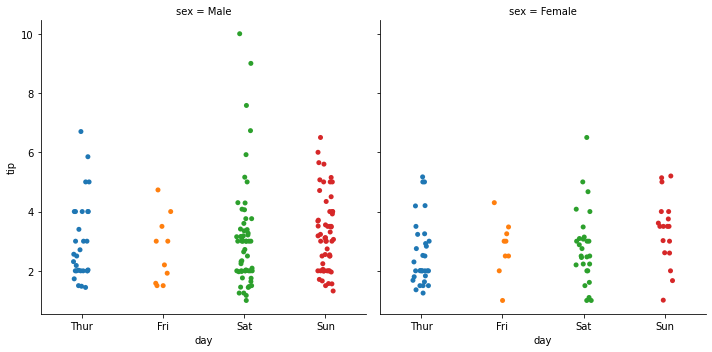

In [104]:
sns.catplot(data=df, x='day', y='tip', col='sex');

In [105]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [106]:
# Soru8: Sigara içenlerin tip verme oranlarının grafiğini çiz.

In [108]:
df.groupby('smoker')[['tip']].mean().T

smoker,Yes,No
tip,3.00871,2.991854


In [110]:
df.groupby('smoker')[['tip']].count().T

smoker,Yes,No
tip,93,151


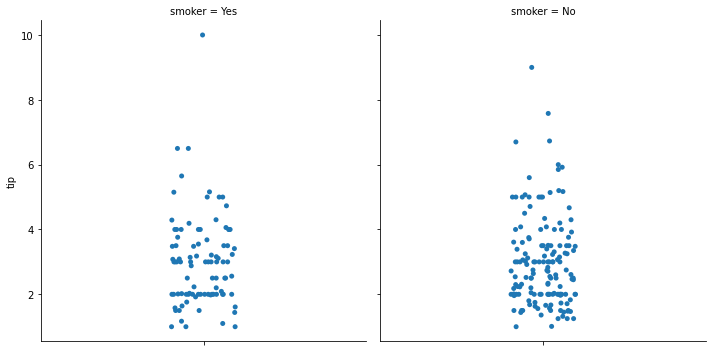

In [122]:
sns.catplot(data=df, y='tip', col='smoker');

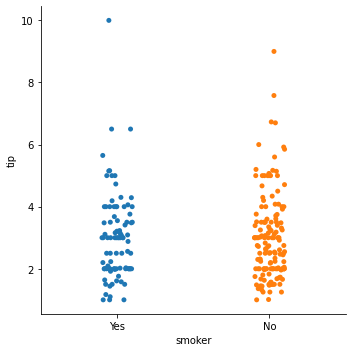

In [109]:
sns.catplot(data=df, x='smoker', y='tip');

In [123]:
# Soru9: En çok hangi gruplar hesap ödüyor?

In [124]:
df.groupby('size')[['total_bill']].count().T

size,1,2,3,4,5,6
total_bill,4,156,38,37,5,4


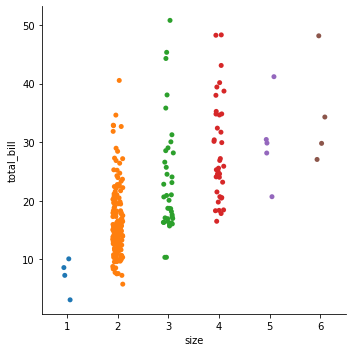

In [125]:
sns.catplot(data=df, x='size', y='total_bill');

In [126]:
# Soru10: Hangi grup en yüksek hesabı ödedi?

In [128]:
df.groupby('size')[['total_bill']].max().T
# 3 kişilik grup 

size,1,2,3,4,5,6
total_bill,10.07,40.55,50.81,48.33,41.19,48.17


In [130]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [131]:
# Soru11: Gündüz ve Gece ciro ortalamalarımızı hesapla.

In [132]:
df.groupby('time')[['total_bill']].mean().T

time,Lunch,Dinner
total_bill,17.168676,20.797159


In [133]:
# Soru12: Kadınlar en fazla günün hangi zamanında restoranımıza geliyorlar ?

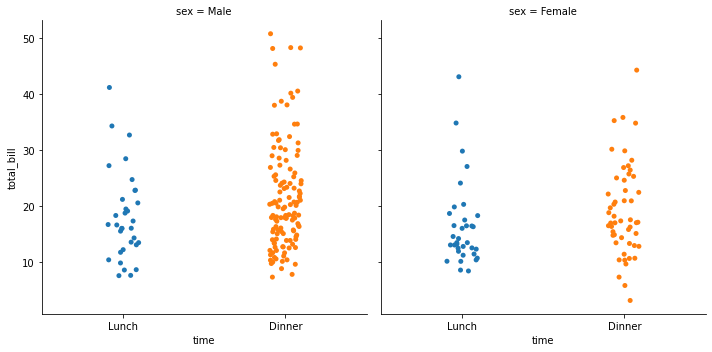

In [139]:
sns.catplot(data=df, x='time', y='total_bill', col='sex');
# Kadınlar en fazla akşam restoranımıza geliyorlar.

In [138]:
df.groupby(['time', 'sex'])[['total_bill']].count().T
# Kadınlar en fazla akşam restoranımıza geliyorlar.

time       Lunch        Dinner       
sex         Male Female   Male Female
total_bill    33     35    124     52

In [140]:
# Soru13: Cinsiyetlerin sigara kullanma oranlarını hesapla.

In [142]:
df.groupby(['sex', 'smoker'])[['total_bill']].mean().T

sex            Male                Female           
smoker          Yes         No        Yes         No
total_bill  22.2845  19.791237  17.977879  18.105185

In [144]:
df.groupby(['sex', 'smoker'])[['total_bill']].count().T
# Kadınlarda da erkeklerde de sigara kullanmayanların sayısı daha fazla.

sex        Male     Female    
smoker      Yes  No    Yes  No
total_bill   60  97     33  54

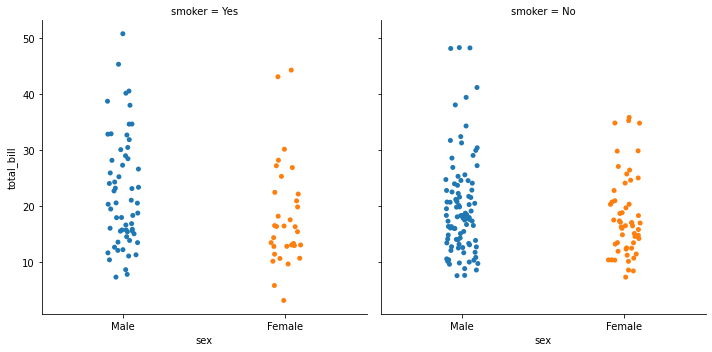

In [145]:
sns.catplot(data=df, x='sex', y='total_bill', col='smoker');

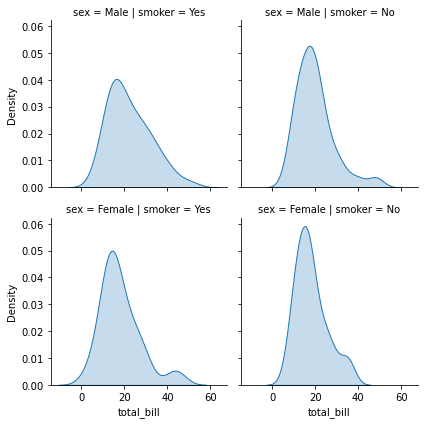

In [157]:
sns.FacetGrid(data=df, col='smoker', row='sex').map(sns.kdeplot, 'total_bill', shade=True);

In [166]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [167]:
# Soru14: Sigara içenler günün hangi vaktinde restoranımıza geliyorlar ?

In [171]:
df.groupby(['smoker', 'time']).count().T
# Sigara içenler akşam daha fazla geliyorlar.

smoker       Yes           No       
time       Lunch Dinner Lunch Dinner
total_bill    23     70    45    106
tip           23     70    45    106
sex           23     70    45    106
day           23     70    45    106
size          23     70    45    106

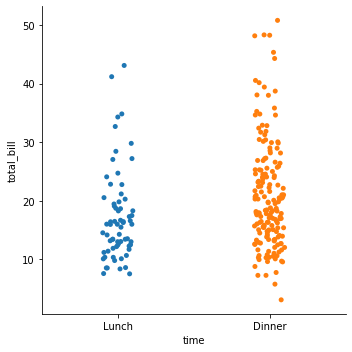

In [172]:
sns.catplot(data=df, x='time', y='total_bill');

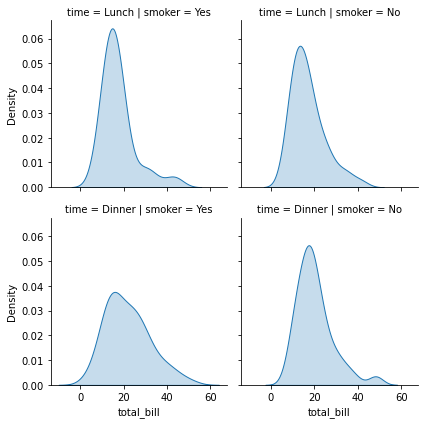

In [175]:
sns.FacetGrid(data=df, col='smoker', row='time').map(sns.kdeplot, 'total_bill', shade=True);
# Sigara içenler Akşam daha fazla geliyorlar.

In [177]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
